In [1]:
import os
from google.colab import drive
import cv2 as cv
from PIL import Image
import pywt
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Vectorizing images

In [ ]:
def image_to_vector(folder_path, class_label,limit_data_count):
  vector = np.array([])
  i = 0
  class_item_count = 0
  for filename in os.listdir(folder_path):
     if class_item_count >= limit_data_count:
        break
     if filename.endswith(".jpeg"):
       if i == 0:
          vector = cv.imread(folder_path + filename,0)
          vector = np.array(cv.resize(vector, (300,300), interpolation = cv.INTER_CUBIC)).flatten()
          i+=1
          class_item_count+=1
       else:
          img = cv.imread(folder_path + filename,0)
          img = np.array(cv.resize(img, (300,300), interpolation = cv.INTER_CUBIC)).flatten()
          vector = np.vstack([vector, np.array(img)])
          class_item_count+=1
  y = np.ones(len(vector))*class_label
  return vector, y

Function to iterate over every class an vectorify the images, it will eventually return just 2 vectors X and y

In [ ]:
def image_to_vector_each_class(folder_path,limit_data_count):
  i = 0
  for class_label in range(5):
    current_class_folder_path = folder_path + "/" + str(class_label) + "/"
    if class_label == 0:
        X,y = image_to_vector(current_class_folder_path, class_label,limit_data_count)
    else:
        curr_X, curr_y = image_to_vector(current_class_folder_path, class_label,limit_data_count)
        X = np.vstack([X, curr_X])
        # print(X.shape)
        y = np.hstack([y, curr_y])
  return X, y

In [ ]:
preprocessed_folder_path = "/content/drive/MyDrive/ML Project/Diabetic Retinopathy/Fungus of Retina/processed_new"
X, y = image_to_vector_each_class(preprocessed_folder_path, 200) #choosing same amount of pictures to overcome imbalance

In [ ]:
X.shape

(500, 90000)

In [ ]:
y.shape

(500,)

## Splitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
start = time.time()
clf = OneVsRestClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced'))
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
print('Single SVC accuracy score : ', accuracy_score(y_pred,y_test))
print('Time taken: ', end - start)
proba = clf.predict_proba(X_test)
n_estimators = 10
start = time.time()
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='poly', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
print("Bagging SVC", accuracy_score(y_pred,y_test))
print('Time taken: ', end - start)
proba = clf.predict_proba(X_test)
start = time.time()
clf = RandomForestClassifier(min_samples_leaf=5)
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
print("Random Forest", accuracy_score(y_pred,y_test))
print('Time taken: ', end - start)
proba = clf.predict_proba(X_test)

Single SVC accuracy score :  0.17575757575757575
Time taken:  302.49538254737854
Bagging SVC 0.15151515151515152
Time taken:  34.13558888435364
Random Forest 0.21212121212121213
Time taken:  4.177470684051514


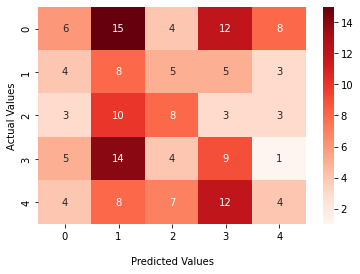

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred,)
ax = sns.heatmap(conf_matrix,annot = True,cmap="Reds")
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

# K nearest neighbours

In [ ]:
## Training KNN with 1 - 15 neighbhors
for i in range(1,15):
  n = i
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train, y_train) 
  y_pred=neigh.predict(X_test)
  print(f"KNN with {n} neighbors : ", accuracy_score(y_pred,y_test))

KNN with 1 neighbors :  0.21818181818181817
KNN with 2 neighbors :  0.18787878787878787
KNN with 3 neighbors :  0.18181818181818182
KNN with 4 neighbors :  0.17575757575757575
KNN with 5 neighbors :  0.17575757575757575
KNN with 6 neighbors :  0.18181818181818182
KNN with 7 neighbors :  0.16363636363636364
KNN with 8 neighbors :  0.17575757575757575
KNN with 9 neighbors :  0.21212121212121213
KNN with 10 neighbors :  0.21818181818181817
KNN with 11 neighbors :  0.24848484848484848
KNN with 12 neighbors :  0.22424242424242424
KNN with 13 neighbors :  0.20606060606060606
KNN with 14 neighbors :  0.20606060606060606


In [ ]:
## best classifier 
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train) 
y_pred=neigh.predict(X_test)

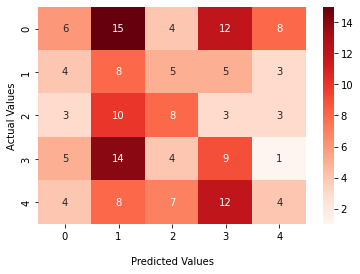

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred,)
ax = sns.heatmap(conf_matrix,annot = True,cmap="Reds")
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');